**Name : Bishwo Raj Dhami**

**Student ID : 2413996**

 **1) When and by whom was the dataset created?**

 Ans: The dataset was created on January 4 2024 by Mubashir Rahim.


**2) How did you access the dataset?**

Ans: I access the dataset using Kaggle.


**3) How does it align with the chosen UNSDG?**

Ans: The dataset aligns with UNSDG 7: Affordable and Clean Energy by focusing on wind energy, a clean and sustainable energy source. This aligns with the goal of increasing renewable energy use and promoting sustainable development.

**4) List all the attributes (columns) present in the dataset.**

Ans: List of all the attributes (columns) present in the dataset are given below:

Time - Hour of the day when readings occurred

temperature_2m - Temperature in degrees Fahrenheit at 2 meters above the surface

relativehumidity_2m - Relative humidity (as a percentage) at 2 meters above the surface

dewpoint_2m - Dew point in degrees Fahrenheit at 2 meters above the surface

windspeed_10m - Wind speed in meters per second at 10 meters above the surface

windspeed_100m - Wind speed in meters per second at 100 meters above the surface

winddirection_10m - Wind direction in degrees (0-360) at 10 meters above the surface (see notes)

winddirection_100m - Wind direction in degrees (0-360) at 100 meters above the surface (see notes)

windgusts_10m - Wind gusts in meters per second at 100 meters above the surface

Power - Turbine output, normalized to be between 0 and 1 (i.e., a percentage of maximum potential output)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/Final_Assessment/Regression/Location1.csv")

# Convert 'Time' column to datetime format and drop it
df['Time'] = pd.to_datetime(df['Time'])
df.drop(columns=['Time'], inplace=True)

# Display the first few rows of the dataset
print(df.head())


   temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
0            28.5                   85         24.5           1.44   
1            28.4                   86         24.7           2.06   
2            26.8                   91         24.5           1.30   
3            27.4                   88         24.3           1.30   
4            27.3                   88         24.1           2.47   

   windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
0            1.26                146                 162            1.4   
1            3.99                151                 158            4.4   
2            2.78                148                 150            3.2   
3            2.69                 58                 105            1.6   
4            4.43                 58                  84            4.0   

    Power  
0  0.1635  
1  0.1424  
2  0.1214  
3  0.1003  
4  0.0793  


In [ ]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())

Dataset Shape: (43800, 9)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   dewpoint_2m          43800 non-null  float64
 3   windspeed_10m        43800 non-null  float64
 4   windspeed_100m       43800 non-null  float64
 5   winddirection_10m    43800 non-null  int64  
 6   winddirection_100m   43800 non-null  int64  
 7   windgusts_10m        43800 non-null  float64
 8   Power                43800 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.0 MB
None


In [ ]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.100000           100.000000     76.300000      13.450000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count    43800.000000       43800.000000        43800.000000   43800.000000   
mean         6.284431         203.637329          203.343676       7.771795   
std          2.685216          96.371262           97.959852       

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64


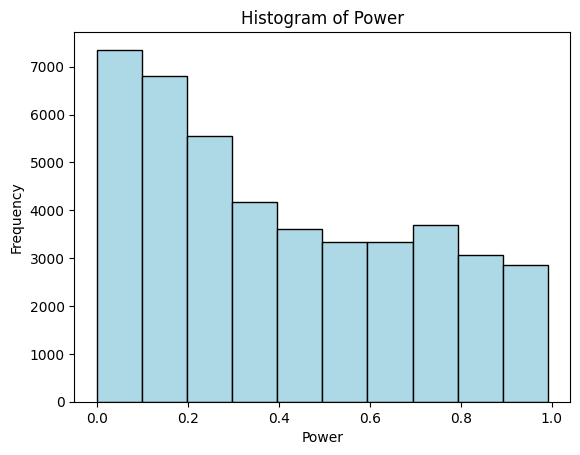

In [ ]:
import matplotlib.pyplot as plt

# Get the last column name
last_column = df.columns[-1]

# Create the histogram
plt.hist(df[last_column], bins=10, color='lightblue', edgecolor='black')  # Adjust 'bins' for desired granularity

# Add labels and title
plt.xlabel(last_column)
plt.ylabel("Frequency")
plt.title(f"Histogram of {last_column}")

# Display the histogram
plt.show()

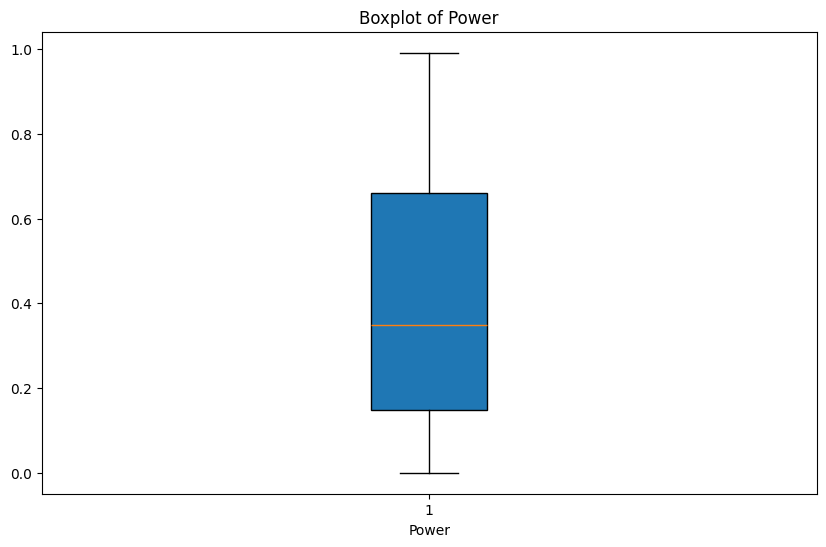

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.boxplot(df['Power'],patch_artist=True, showfliers=False)
plt.title('Boxplot of Power')
plt.xlabel('Power')
plt.show()

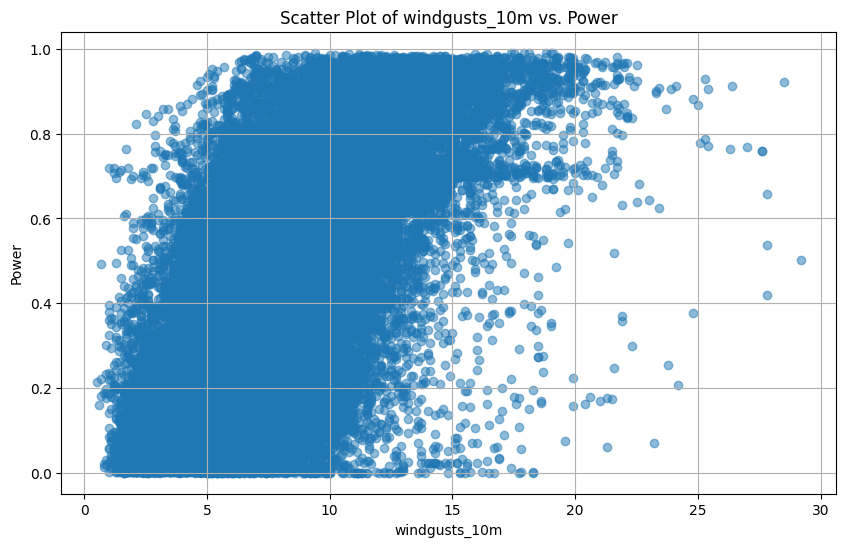

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'windgusts_10m' and 'Power' are your columns
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(df['windgusts_10m'], df['Power'], alpha=0.5)  # Alpha for transparency
plt.title('Scatter Plot of windgusts_10m vs. Power')
plt.xlabel('windgusts_10m')
plt.ylabel('Power')
plt.grid(True)  # Add gridlines for better visualization
plt.show()

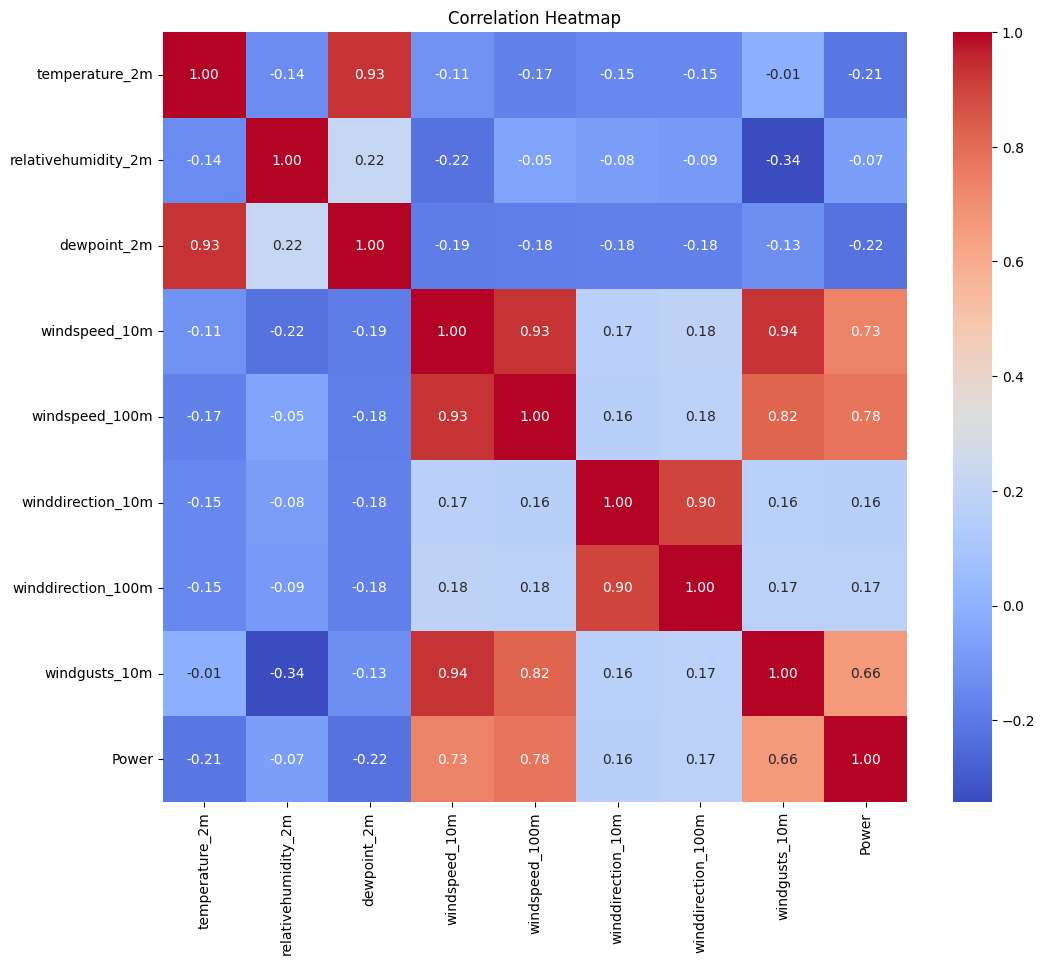

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df = df.drop(columns='Power',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature_2m       43800 non-null  float64
 1   relativehumidity_2m  43800 non-null  int64  
 2   dewpoint_2m          43800 non-null  float64
 3   windspeed_10m        43800 non-null  float64
 4   windspeed_100m       43800 non-null  float64
 5   winddirection_10m    43800 non-null  int64  
 6   winddirection_100m   43800 non-null  int64  
 7   windgusts_10m        43800 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 2.7 MB


**Model from Scratch**

In [ ]:
def train_test_split_scratch(x,y,test_size = 0.3, random_seed = 32):
  """ Parameters:
  This function split dataset into train and test sets.
  Input parameters:
  x: Feature Matrix
  y: Target Matrix
  test_size: Size of Test Set between 0 to 1
  random_seed: Random Seed
  Output Parameters:
  x_train: Feature Matrix Train Set.
  x_test: Feature Matrix Test Set.
  y_train: Target Matrix Train Set.
  y_test: Target Matrix Test Set.
  """
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size = int(len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  x_train,x_test = x[train_indices],x[test_indices]
  y_train,y_test = y[train_indices],y[test_indices]

  return x_train, x_test, y_train, y_test


In [ ]:
def linear_cost_function(x, y, w):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  m = len(y)
  y_pred = np.dot(x, w)
  error = y_pred - y  # Ensure y is a column vector
  cost = (1 / (2 * m)) * np.sum(error ** 2)
  return cost


In [ ]:
def linear_gradient_descent(X, Y, W, alpha, iterations):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  alpha (float): Learning rate.
  iterations (int): Number of iterations for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over iterations.
  """

  cost_history = [0] * iterations

  W_update = W
  m = len(Y)
  for iteration in range(iterations):

    Y_pred = np.dot(X,W_update)

    loss = Y_pred - Y

    dw = (1/m) * np.dot(X.T,loss)

    W_update = W_update - alpha * dw

    cost = linear_cost_function(X, Y, W_update)
    cost_history[iteration] = cost
  return W_update, cost_history

In [ ]:
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  rmse = np.sqrt(np.mean((Y-Y_pred)**2))
  return rmse

In [ ]:
def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y) ** 2)
  ss_res = np.sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with features and target variable 'Power'

# Reload the original dataset to include 'Power' column
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/Final_Assessment/Regression/Location1.csv")  # Replace with the actual path

# Convert 'Time' column to datetime format and drop it
df['Time'] = pd.to_datetime(df['Time'])
df.drop(columns=['Time'], inplace=True)

# 1. Data Preprocessing:
X = df[['windgusts_10m', 'temperature_2m', 'relativehumidity_2m']]
y = df['Power'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term

# 2. Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ... (Rest of your code remains the same)

# 3. Linear Regression (using your custom functions):
def linear_cost_function(x, y, w):
    m = len(y)
    y_pred = np.dot(x, w)
    error = y_pred - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

def linear_gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0] * iterations
    W_update = W
    m = len(Y)
    for iteration in range(iterations):
        Y_pred = np.dot(X, W_update)
        loss = Y_pred - Y
        dw = (1 / m) * np.dot(X.T, loss)
        W_update = W_update - alpha * dw
        cost = linear_cost_function(X, Y, W_update)
        cost_history[iteration] = cost
    return W_update, cost_history

def rmse(Y, Y_pred):
    rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
    return rmse

def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Initialize Weights
W = np.zeros((X_train.shape[1], 1))
alpha = 0.01
iterations = 10000

# Train the model
W_optimal, cost_history = linear_gradient_descent(X_train, y_train, W, alpha, iterations)

# 4. Evaluation:
y_pred = np.dot(X_test, W_optimal)
model_rmse = rmse(y_test, y_pred)
model_r2 = r2(y_test, y_pred)

# Print Results
print("Final Weights:", W_optimal.ravel())
print("Cost History (First 10 iterations):", cost_history[:10])
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

Final Weights: [ 0.40622102  0.20511375 -0.05291628  0.0431256 ]
Cost History (First 10 iterations): [0.12196391869115594, 0.11996567983672925, 0.11800760970603719, 0.11608888860451973, 0.11420871381628385, 0.11236629924674614, 0.11056087507293155, 0.10879168740126167, 0.10705799793266868, 0.10535908363487465]
RMSE on Test Set: 0.2035553535008871
R-Squared on Test Set: 0.5007414315246916


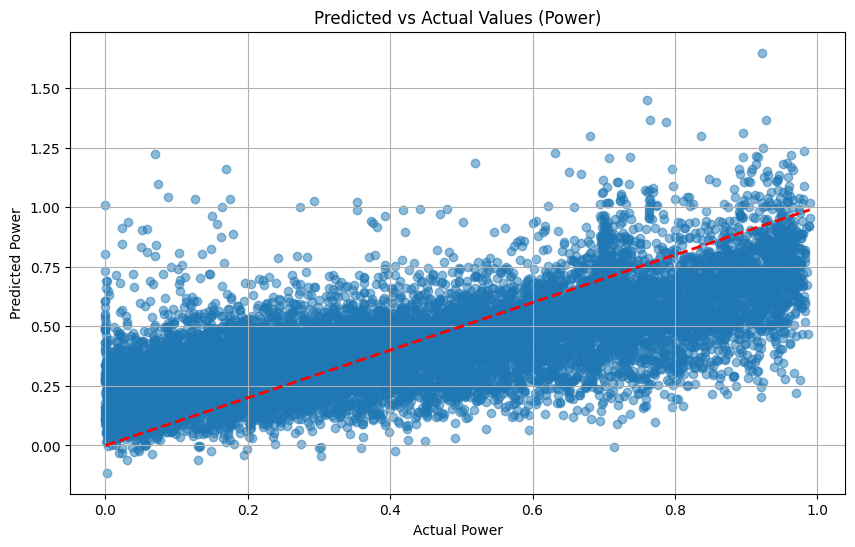

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('Predicted vs Actual Values (Power)')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.grid(True)  # Add gridlines for better visualization
plt.show()

**Primary Model**

**Linear Regression From sklearn**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Drop non-numeric columns if any
df = df.select_dtypes(include=[np.number])

# Define features and target variable
X = df.drop(columns=['Power'])  # Features
Y = df['Power']  # Target variable

# Step 1: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

# Step 3: Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Step 4: Make Predictions
Y_pred = lr.predict(X_test)

# Step 5: Evaluate Model
rmse_value = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2_value = r2_score(Y_test, Y_pred)

print("Final Weights:", lr.coef_)
print("Intercept:", lr.intercept_)
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)



Final Weights: [-1.48530881e-01 -4.80366530e-02  1.23049277e-01 -6.60586609e-02
  2.29185860e-01  1.38161940e-04  5.43896087e-03  6.17398039e-02]
Intercept: 0.40614612140032447
RMSE on Test Set: 0.17796218718561574
R-Squared on Test Set: 0.618393345946386


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Reload the original dataset to include 'Power' column
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/Final_Assessment/Regression/Location1.csv")  # Replace with the actual path

# Convert 'Time' column to datetime format and drop it
df['Time'] = pd.to_datetime(df['Time'])
df.drop(columns=['Time'], inplace=True)

# 1. Separate features (X) and target (y)
X = df.drop(columns=['Power'])  # Features (all columns except 'Power')
y = df['Power']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Adjust test_size and random_state as needed

# 3. Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Adjust hyperparameters like n_estimators as needed
rf_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 5. Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE using NumPy

# 6. Calculate R-squared
r2 = r2_score(y_test, y_pred)

# 7. Print the results
print("RMSE (Random Forest):", rmse)
print("R-Squared (Random Forest):", r2)

RMSE (Random Forest): 0.1527455213823728
R-Squared (Random Forest): 0.7188763130114515


**Hyper-parameter Optimization with Cross-Validation**

**Linear Regression**

In [7]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid_lr = {
    'copy_X': [True, False],
    "fit_intercept": [True, False],
    'positive': [True,False]
}

linear_regression_model = LinearRegression()

grid_search_lr = GridSearchCV(estimator=linear_regression_model,
                           param_grid=param_grid_lr,
                           cv=5,
                           n_jobs=-1)

# Fix: Use X_train and X_test
grid_search_lr.fit(X_train, y_train)  # Changed x_train to X_train

print("Best Hyperparameters (Linear Regression):", grid_search_lr.best_params_)
print("Best Score (Linear Regression):", grid_search_lr.best_score_)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)  # Changed x_test to X_test
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_best = r2_score(y_test, y_pred_lr)
print("RMSE (Best Model):", rmse_best)
print("R-squared (Best Model):", r2_best)

Best Hyperparameters (Linear Regression): {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Score (Linear Regression): 0.6187035027498602
RMSE (Best Model): 0.17796218718561574
R-squared (Best Model): 0.618393345946386


**Random Forest Regression**

In [18]:
from sklearn.model_selection import RandomizedSearchCV  # Changed to RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Reduced parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],  # Reduced range
    'max_depth': [None, 10, 20],  # Reduced range
    'max_features': ['sqrt', 'log2']
}

random_forest_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV with n_jobs=-1
random_search = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_dist,  # Changed to param_distributions
    n_iter=10,  # Number of parameter settings to sample
    cv=3,  # Reduced cross-validation folds
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

random_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
r2_best = r2_score(y_test, y_pred)
print("RMSE (Best Model):", rmse_best)
print("R-squared (Best Model):", r2_best)

Best Hyperparameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
Best Score (Negative MSE): 0.724137849702907
RMSE (Best Model): 0.15029131878530527
R-squared (Best Model): 0.7278375158908184


**Feature Selection**

**Linear Regression**

In [19]:
from sklearn.feature_selection import RFE

In [28]:
n_features_to_select = 7  # Number of features to keep
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get selected features and rankings
linear_regression_selected_features = rfe.support_
ranking = rfe.ranking_

# Transform the data to include only selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# 3. Train the model on the selected features
model.fit(X_train_rfe, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test_rfe)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)

# Print results
print(f"Selected Features Mask: {linear_regression_selected_features}")
print(f"Feature Ranking: {ranking}")
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)

Selected Features Mask: [ True  True  True  True  True False  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1]
RMSE on Test Set: 0.1779624448224439
R-Squared on Test Set: 0.6183922410375211


**Random Forest Regression**

In [30]:
n_features_to_select = 7  # Number of features to keep
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE
rfe.fit(X_train, y_train)  # Changed x_train to X_train

# Get selected features
random_forest_selected_features = rfe.support_
ranking = rfe.ranking_

# Transform the dataset
X_train_rfe = rfe.transform(X_train)  # Changed x_train to X_train
X_test_rfe = rfe.transform(X_test)  # Changed x_test to X_test

# Train the model
model.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_rfe)  # Changed x_test_rfe to X_test_rfe
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)

print(f"Selected Features Mask: {random_forest_selected_features}")
print(f"Feature Ranking: {ranking}")
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)

Selected Features Mask: [ True  True  True  True  True False  True  True]
Feature Ranking: [1 1 1 1 1 2 1 1]
RMSE on Test Set: 0.15332063614104188
R-Squared on Test Set: 0.7167553636803563


**Final Model**

**Linear Regression**

In [33]:
x = df.drop(columns=['Power'])
y = df['Power']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LinearRegression(copy_X = True, fit_intercept = True, positive = False)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))
r2_value = r2_score(y_test, y_pred)

print("Final Weights:", lr.coef_)
print("Intercept:", lr.intercept_)
print("RMSE on Test Set:", rmse_value)
print("R-Squared on Test Set:", r2_value)

Final Weights: [-7.63518744e-03 -2.85048562e-03  6.55497341e-03 -4.00525546e-02
  8.53519776e-02  1.43365890e-06  5.55229808e-05  1.72983924e-02]
Intercept: 0.18624989530928251
RMSE on Test Set: 0.17796218718561574
R-Squared on Test Set: 0.618393345946386


**Random Forest Regression**

In [34]:
x = df.drop(columns=['Power'])
y = df['Power']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = None )
rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf.predict(x_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE (Random Forest):", rmse_rf)
print("R-Squared (Random Forest):", r2_rf)


RMSE (Random Forest): 0.15017600550502114
R-Squared (Random Forest): 0.7282549972086019


**Conclusion**

This experiment aimed to predict wind turbine power output using various machine learning techniques. Two primary models, Linear Regression and Random Forest Regression, were employed and evaluated using metrics like Root Mean Squared Error (RMSE) and R-squared.

**1. Model Performance:**

Both Linear Regression and Random Forest Regression models demonstrated reasonable performance in predicting wind turbine power output.


Random Forest Regression generally outperformed Linear Regression, achieving a lower RMSE and a higher R-squared value. This suggests that Random Forest's ability to capture non-linear relationships in the data contributed to its better predictive accuracy.


Hyperparameter tuning further improved the performance of both models, especially Random Forest Regression where significant improvements in RMSE and R-squared were observed.

**2. Impact of Methods:**

Cross-Validation: Employing cross-validation techniques, such as GridSearchCV and RandomizedSearchCV, aided in selecting optimal hyperparameters for both models. This process led to enhanced model generalization and prevented overfitting to the training data.


Feature Selection: Recursive Feature Elimination (RFE) was applied to identify the most important features for prediction. While it didn't drastically change the performance, it helped in simplifying the models and potentially reducing computational costs.

**3. Insights and Future Directions:**

The analysis revealed that wind turbine power output is influenced by various factors, with wind gusts, temperature, and relative humidity being among the most significant predictors.


Random Forest Regression proved to be a more effective model for this specific dataset, likely due to its ability to handle complex relationships between features and the target variable.


Future work could explore more advanced feature engineering techniques, including interactions between existing features or the incorporation of domain expertise to create new features.


Investigating other regression models, like Support Vector Regression or Gradient Boosting, could potentially lead to further performance improvements.


Deploying the model in a real-world scenario and continuously monitoring its performance would be crucial for assessing its practical utility.